In [123]:
import pandas as pd

In [124]:
import numpy as np

In [125]:
from matplotlib import pyplot as plt

In [218]:
df = pd.read_csv('Crime.csv')
df.head(2)
#proof that file is open and working

,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
0,ALABAMA,HUNTSVILLE4,2018.0,196620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,HUNTSVILLE4,2019.0,196620,872.0,12.0,79.0,159.0,622.0,3854.0,554.0,2804.0,496.0,NaN


In [219]:
#This function serves to validate that the user has asked for a city that is in the dataframe
def findCity(city):
    x = 0
    while x == 0:
        city_count = df['City'].str.contains(city).sum()
        pop_count = df.loc[df['City'] == city,'Population'].sum()
        
        if city_count > 0 and pop_count > 0:
            return city
            x = 1
            #Validation of city (True)
        else: 
            print('That City in not listed please enter a new city')
            city = input('What city would you like to know about: ').upper()
            x = 0
            #Invalidation of city (False)

In [220]:
#This function determines the year that the user would like to get data from and compiles it into a single dataframe
def findYear (city, year):
    filterDf = df[(df['City'] == city) & (df['Year'] == year)]
    return filterDf

In [221]:
#This function removes string variables as well as non-pertinent numerical data to be used in the pie graph
def pieData(filteredDf):
    pieDataFrame = filteredDf.drop(columns=['State', 'City','Population','Year'])
    return pieDataFrame

What city would you like to know about: cary
What year would you like to know about 2018 or 2019? 2019


,State,City,Year,Population,Violent Crime,Murder,Rape,Robbery,Aggravated assault,Property Crime,Burglary,Larceny Theft,Motor Vehicle Theft,Arson
375,"NORTH CAROLINA 5, 6, 8",CARY,2019.0,170518,56.0,0.0,6.0,19.0,31.0,703.0,93.0,578.0,32.0,0.0


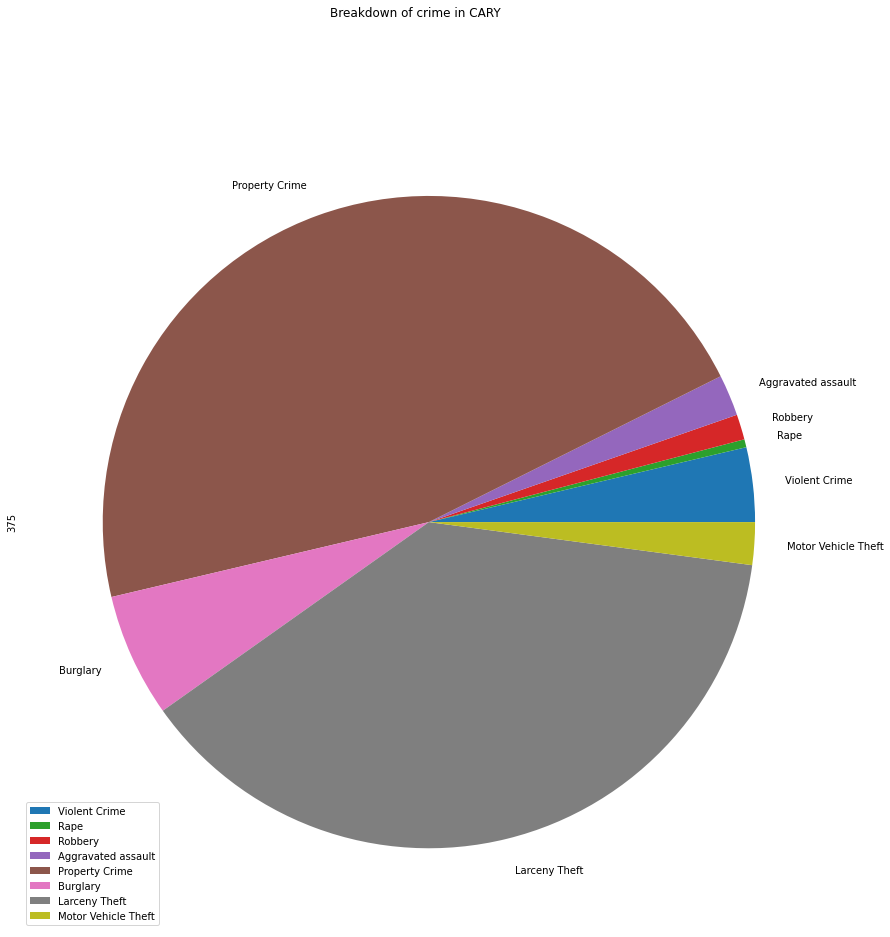

In [222]:
#main body of code where user is prompted to give a city and a year of data they would like to review
city = input('What city would you like to know about: ').upper()
validCity = findCity(city)

year = int(input('What year would you like to know about 2018 or 2019? '))
dataYear = findYear(validCity, year)

piePlot = pieData(dataYear)


piePlot.T.plot.pie(subplots=True, figsize=(15, 15), title = f'Breakdown of crime in {city}')
dataYear



In [223]:
#data for the user to review and compare data from chosen city to national averages.
fdata = df.drop(columns=['State', 'City','Population','Year'])
national_avg = fdata.mean()

In [232]:
x = piePlot.iloc[0]
y = national_avg



In [233]:
barCompare = pd.concat([x, y], axis=1)
barCompare

,375,0
Violent Crime,56.0,961.429889
Murder,0.0,12.880218
Rape,6.0,88.721402
Robbery,19.0,266.315789
Aggravated assault,31.0,591.891107
Property Crime,703.0,4474.833638
Burglary,93.0,698.229508
Larceny Theft,578.0,3231.797814
Motor Vehicle Theft,32.0,577.533575
Arson,0.0,24.870229


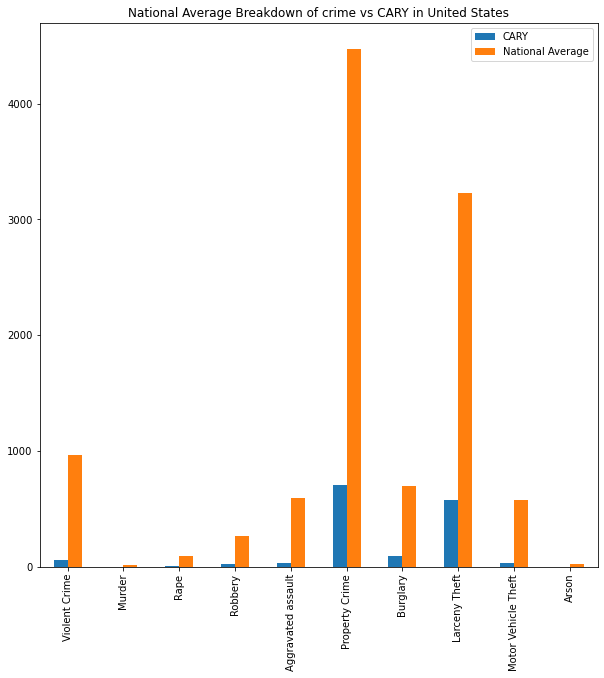

In [234]:
memphis = 'Memphis'
Nat_avg = 'National Average'

ax = barCompare.plot.bar( figsize=(10, 10), title = f'National Average Breakdown of crime vs {city} in United States')
ax.legend([city, "National Average"])